# ***EDA (Exploratory Data Analysis)***

Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques and statistical techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations.

**Steps involved in EDA**


1.Describing the data

2.Data cleaning

3.Imputation techniques

4.Data analysis and visualization

5.Transformations

6.Auto EDA

In [ ]:
import pandas as pd #Import pandas library
import numpy as np #Import numpy library
import matplotlib.pyplot as plt #Import pyplot from matplotlib library
import seaborn as sns #import seaborn library
plt.rcParams['figure.figsize'] = (10,5) #Set parameter for graphs
plt.rcParams['figure.dpi'] = 250 #Set parameter for graphs
import warnings #Import warnings
warnings.filterwarnings('ignore') #Ignore warnings
sns.set_style('darkgrid') #Set graph style
%matplotlib inline

In [ ]:
#load dataset
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/data_clean.csv',index_col=0)
df.head()

Ozone  Solar.R  Wind Temp C Month  Day  Year  Temp Weather
1   41.0    190.0   7.4     67     5    1  2010    67       S
2   36.0    118.0   8.0     72     5    2  2010    72       C
3   12.0    149.0  12.6     74     5    3  2010    74      PS
4   18.0    313.0  11.5     62     5    4  2010    62       S
5    NaN      NaN  14.3     56     5    5  2010    56       S

In [ ]:
df.describe() #Descriptive statistics of all numerical columns

Ozone     Solar.R        Wind         Day    Year        Temp
count  120.000000  151.000000  158.000000  158.000000   158.0  158.000000
mean    41.583333  185.403974    9.957595   16.006329  2010.0   77.727848
std     32.620709   88.723103    3.511261    8.997166     0.0    9.377877
min      1.000000    7.000000    1.700000    1.000000  2010.0   56.000000
25%     18.000000  119.000000    7.400000    8.000000  2010.0   72.000000
50%     30.500000  197.000000    9.700000   16.000000  2010.0   78.500000
75%     61.500000  257.000000   11.875000   24.000000  2010.0   84.000000
max    168.000000  334.000000   20.700000   31.000000  2010.0   97.000000

In [ ]:
df.describe(include=object) #Descriptive statistics of categorical columns

Temp C Month Weather
count     158   158     155
unique     41     6       3
top        81     9       S
freq       11    34      59

In [ ]:
#Here we can see Temp c column and month column also shown in categorical columns but there are numerical values in those columns.
#So we check data type of all columns
df.info() #It gives us column names, Nos of non-null values and data type.

#Ozone, Solar R, Weather columns has null value
#Temp c and month column data type shows as object means there is any categorical value.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 1 to 158
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Temp C   158 non-null    object 
 4   Month    158 non-null    object 
 5   Day      158 non-null    int64  
 6   Year     158 non-null    int64  
 7   Temp     158 non-null    int64  
 8   Weather  155 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 12.3+ KB


# **Data type conversion**

There are 2 ways by which we can convert the data type of these 2 columns


1.By using replace method.

2.By using pandas built in functions.

In [ ]:
#Unique value in Temp C column
df['Temp C'].unique()
#We can see there is 'C' value in output due to this 'c' value we get object data type for Temp C column

array(['67', '72', '74', '62', '56', '66', '65', '59', '61', '69', 'C',
       '68', '58', '64', '57', '73', '81', '79', '76', '78', '84', '85',
       '82', '87', '90', '93', '92', '80', '77', '75', '83', '88', '89',
       '91', '86', '97', '94', '96', '71', '63', '70'], dtype=object)

In [ ]:
#Unique value in Month column
df['Month'].unique()
#We can see there is 'May' value in output due to this 'May' value we get object data type for Month column

array(['5', 'May', '6', '7', '8', '9'], dtype=object)

In [ ]:
#Using replace method we will convert May value into 5 value in Month column.
#df['Month'].replace('May',5) this code will give us temporary result so we use inplace function for permanent result in month column.
df['Month'].replace('May',5,inplace = True)
#Now, May is replace by 5 in Month column.

In [ ]:
df.info()
#But still data type of Month column is Object.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 1 to 158
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Temp C   158 non-null    object 
 4   Month    158 non-null    object 
 5   Day      158 non-null    int64  
 6   Year     158 non-null    int64  
 7   Temp     158 non-null    int64  
 8   Weather  155 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 12.3+ KB


In [ ]:
#By astype function we can change column data type eg. string, integer, boolian.
#This is also temporary result and there is no inplace function in astype function.
#So we assign same column name to that function this will save permanantly for Month column.
df['Month']=df['Month'].astype(int)

In [ ]:
df.dtypes
#Now we can see data type of Month column is integer

Ozone      float64
Solar.R    float64
Wind       float64
Temp C      object
Month        int64
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

In [ ]:
#Using pandas built in fuction to_numeric we convert 'C' value into Null value in Temp C column
df['Temp C']=pd.to_numeric(df['Temp C'],errors ='coerce')
# Data type of Temp C column is also change object to float

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 1 to 158
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Temp C   157 non-null    float64
 4   Month    158 non-null    int64  
 5   Day      158 non-null    int64  
 6   Year     158 non-null    int64  
 7   Temp     158 non-null    int64  
 8   Weather  155 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 12.3+ KB


# **Duplicates**

In [ ]:
df.duplicated() #This will give us answer in True/False. If there is any duplicate records it will show True.

1      False
2      False
3      False
4      False
5      False
       ...  
154    False
155    False
156    False
157     True
158    False
Length: 158, dtype: bool

In [ ]:
df.duplicated().sum() #This will show how many duplicated records are there in Dataset.

1

In [ ]:
df[df.duplicated()] #This will show duplicated records in Dataset

Ozone  Solar.R  Wind  Temp C  Month  Day  Year  Temp Weather
157   14.0    191.0  14.3    75.0      9   28  2010    75       S

In [ ]:
df[(df['Ozone'] == 14.0) & (df['Day']==28)] #This approach is pandas filtering

Ozone  Solar.R  Wind  Temp C  Month  Day  Year  Temp Weather
151   14.0    191.0  14.3    75.0      9   28  2010    75       S
157   14.0    191.0  14.3    75.0      9   28  2010    75       S

In [ ]:
df[df.duplicated(keep=False)] #This will show all records whichever are same.

Ozone  Solar.R  Wind  Temp C  Month  Day  Year  Temp Weather
151   14.0    191.0  14.3    75.0      9   28  2010    75       S
157   14.0    191.0  14.3    75.0      9   28  2010    75       S

# **Drop duplicate records**

In [ ]:
df.drop_duplicates(inplace = True) #It will delete duplicate records

In [ ]:
df.duplicated().sum() #Now there is no duplicate record.

0

In [ ]:
df.shape #Nos of rows are now 157 means we delete 1 duplicate record

(157, 9)

# **Drop columns**



*   There is one column which only has single different value.

*   We need to get rid of all the uneccesary columns or else it will be very complex data




In [ ]:
df.head()

Ozone  Solar.R  Wind  Temp C  Month  Day  Year  Temp Weather
1   41.0    190.0   7.4    67.0      5    1  2010    67       S
2   36.0    118.0   8.0    72.0      5    2  2010    72       C
3   12.0    149.0  12.6    74.0      5    3  2010    74      PS
4   18.0    313.0  11.5    62.0      5    4  2010    62       S
5    NaN      NaN  14.3    56.0      5    5  2010    56       S

In [ ]:
#Temp C and Temp columns are exactly same so we can drop Temp C column because there is one null value also.
#Year column has only one value so we can drop that column also
df.drop(columns = ['Temp C','Year'],inplace = True)
#We drop Temp C & Year columns permanantly

In [ ]:
df.head()

Ozone  Solar.R  Wind  Month  Day  Temp Weather
1   41.0    190.0   7.4      5    1    67       S
2   36.0    118.0   8.0      5    2    72       C
3   12.0    149.0  12.6      5    3    74      PS
4   18.0    313.0  11.5      5    4    62       S
5    NaN      NaN  14.3      5    5    56       S

In [ ]:
df.rename(columns={'Solar.R' : 'Solar'}, inplace=True) # Rename Solar.R column name to Solar.

In [ ]:
df.head()

Ozone  Solar  Wind  Month  Day  Temp Weather
1   41.0  190.0   7.4      5    1    67       S
2   36.0  118.0   8.0      5    2    72       C
3   12.0  149.0  12.6      5    3    74      PS
4   18.0  313.0  11.5      5    4    62       S
5    NaN    NaN  14.3      5    5    56       S

# **Missing value imputation**





*  Handling missing values is a crucial step in EDA.


* Missing values can appear for several reasons like:

   1.Incomplete data entry

   2.Issues with machines

   3.Improper handling of data

   4.And many more.


















In [ ]:
df.isna() #This will give us answer in True/False. If there is any missing value (null records) it will show True.

Ozone  Solar   Wind  Month    Day   Temp  Weather
1    False  False  False  False  False  False    False
2    False  False  False  False  False  False    False
3    False  False  False  False  False  False    False
4    False  False  False  False  False  False    False
5     True   True  False  False  False  False    False
..     ...    ...    ...    ...    ...    ...      ...
153  False  False  False  False  False  False    False
154  False  False  False  False  False  False    False
155  False  False  False  False  False  False    False
156   True  False  False  False  False  False    False
158  False  False  False  False  False  False    False

[157 rows x 7 columns]

In [ ]:
df.isna().sum() #It will show nos of missing value (null records) in all columns.

Ozone      38
Solar       7
Wind        0
Month       0
Day         0
Temp        0
Weather     3
dtype: int64

<Axes: >

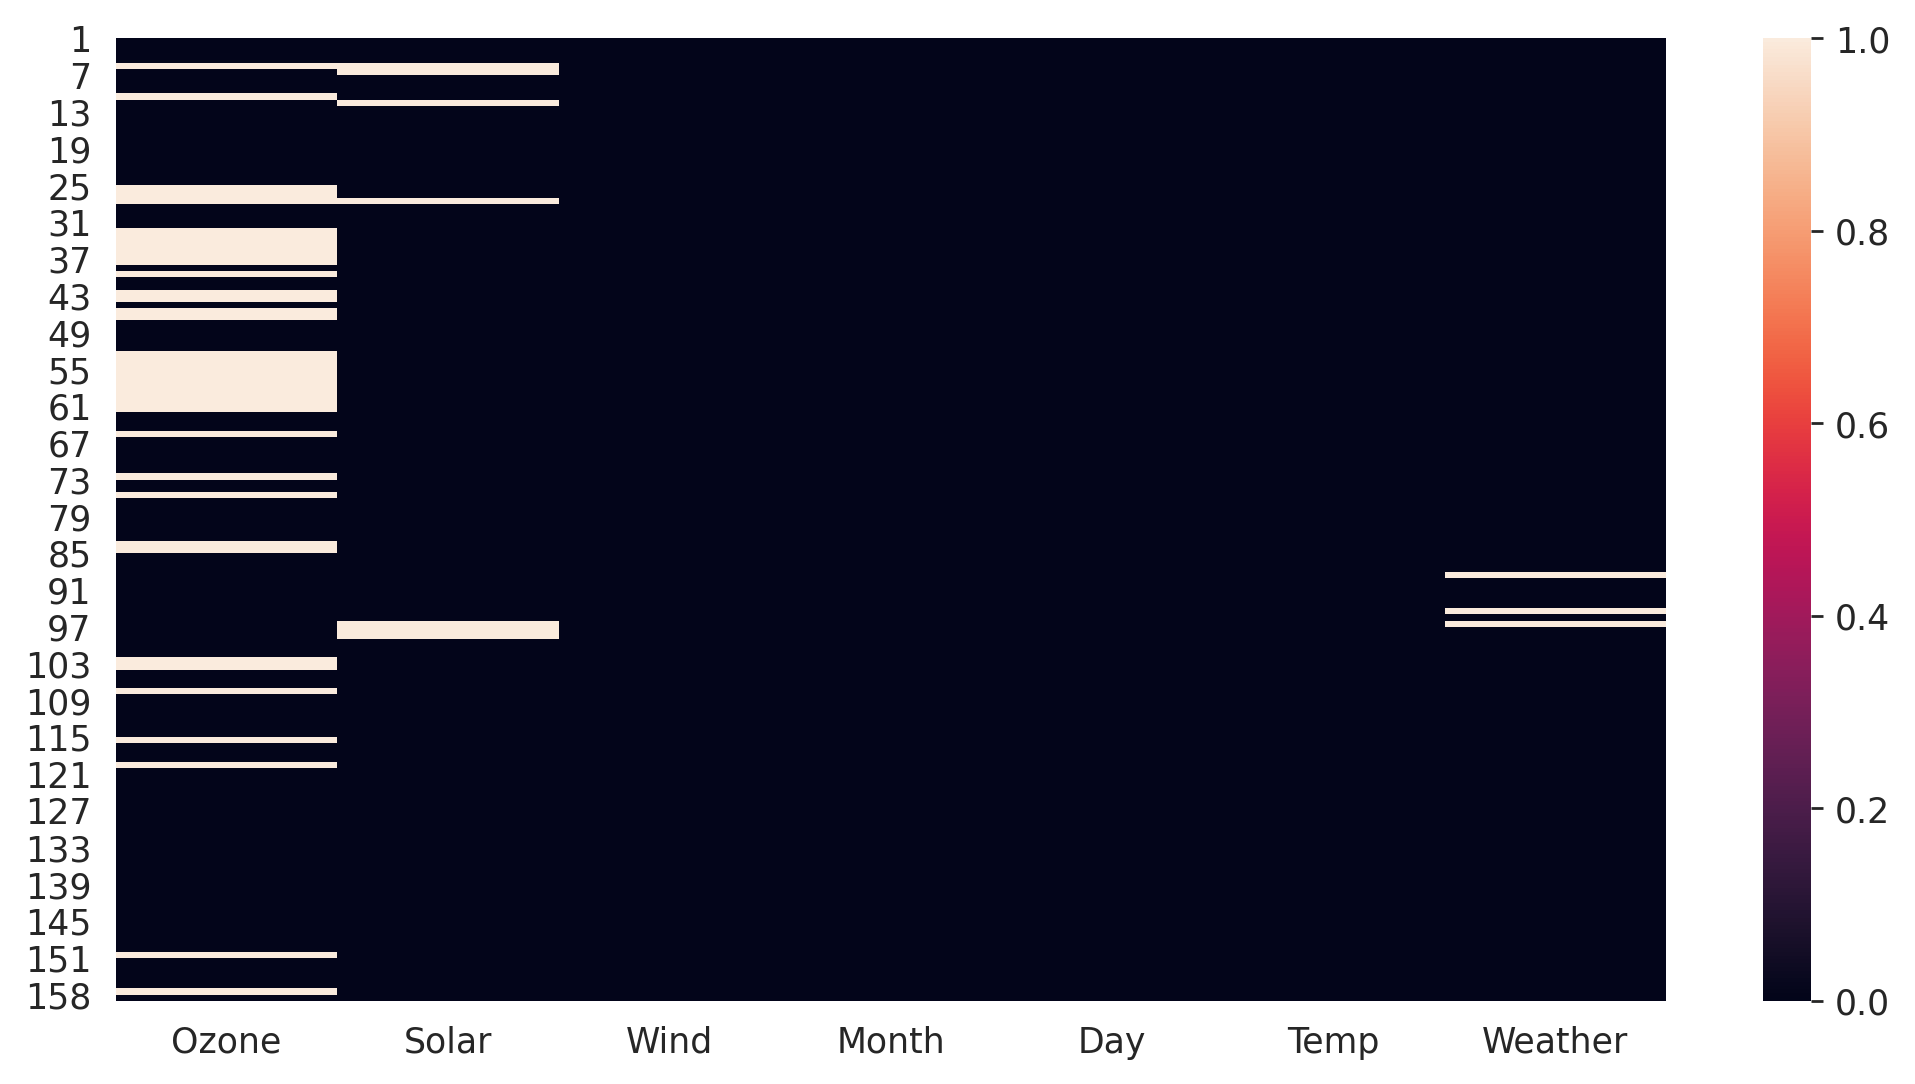

In [ ]:
#Visualization of missing value
sns.heatmap(df.isna())

#It will show missing value visualization by heatmap.

# **Rules for missing value imputation:**



1.  If the null values are less than 3%, you can drop those observation.


2.  If the null values are between 3 to 40%, fill those null values.


3.  The null values are more than 40%, drop that column.

In [ ]:
#Calculate the percentage of missing values in each column.
null_val = df.isna().sum()/len(df)*100
null_val

Ozone      24.203822
Solar       4.458599
Wind        0.000000
Month       0.000000
Day         0.000000
Temp        0.000000
Weather     1.910828
dtype: float64

In [ ]:
#Calculate the percentage of missing values in each column by for loop
for i in df.isna().sum():
  print (f'Missing values : {(i/len(df)*100)}')

Missing values : 24.203821656050955
Missing values : 4.45859872611465
Missing values : 0.0
Missing values : 0.0
Missing values : 0.0
Missing values : 0.0
Missing values : 1.910828025477707


<Axes: >

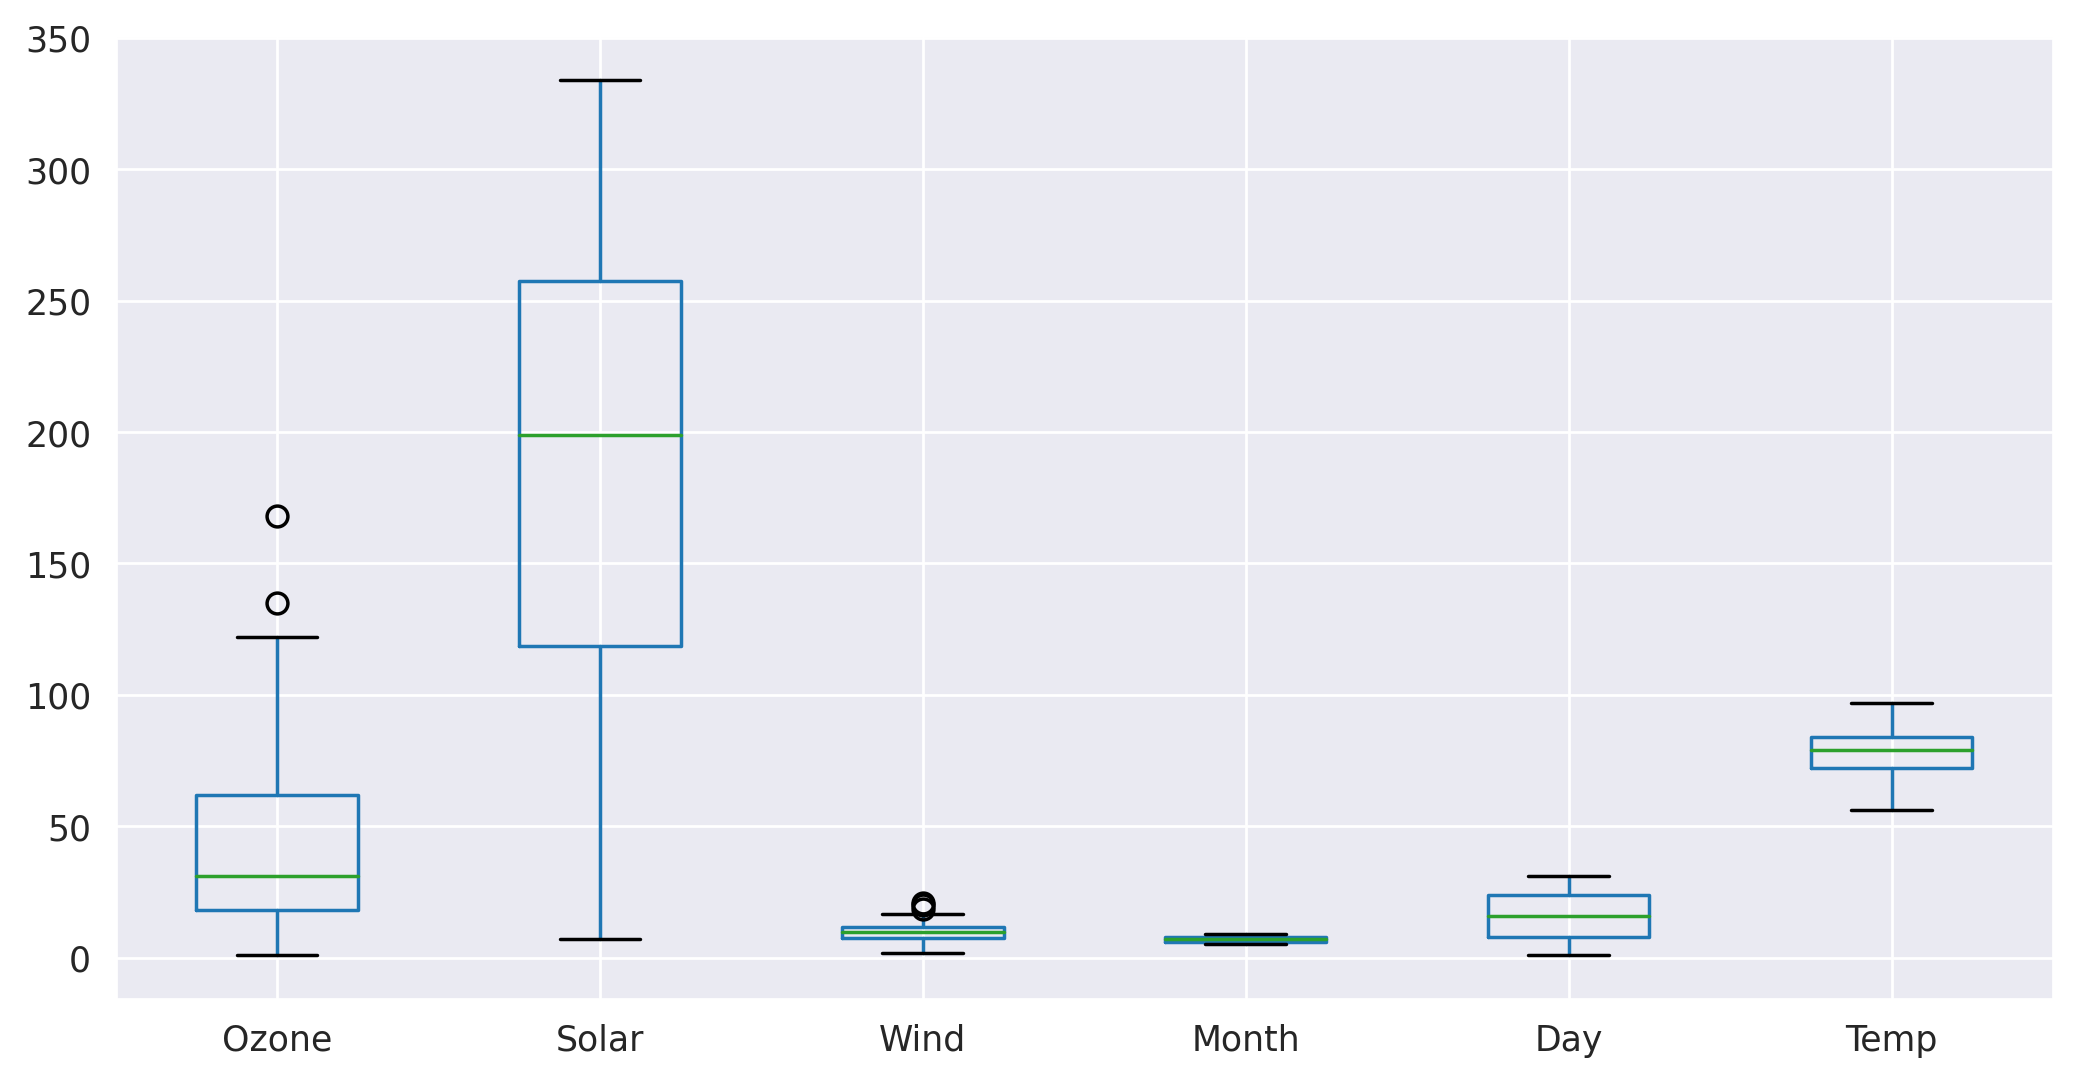

In [ ]:
df.boxplot() #Plot boxplot to identify which columns has outliers

In [ ]:
#fill missing values by median.
df['Ozone'].fillna(df['Ozone'].median(), inplace=True)

In [ ]:
#fill missing values by median.
df['Solar'].fillna(df['Solar'].median(), inplace=True)

In [ ]:
#To show mode value
df['Weather'].mode()

0    S
Name: Weather, dtype: object

In [ ]:
#fill missing values by mode.
#[0] is used for index of 1st mode value
df['Weather'].fillna(df['Weather'].mode()[0], inplace=True)

In [ ]:
df.isna().sum()
#Now there is no missing value.

Ozone      0
Solar      0
Wind       0
Month      0
Day        0
Temp       0
Weather    0
dtype: int64

# **Outlier detection**

There are multiple approaches to detect outliers in the dataset.

1.Histogram

2.Boxplot

3.Descriptive stats for df

In [ ]:
#Descriptive stats
df.describe()

Ozone       Solar        Wind       Month         Day        Temp
count  157.000000  157.000000  157.000000  157.000000  157.000000  157.000000
mean    39.197452  185.974522    9.929936    7.019108   15.929936   77.745223
std     28.781992   87.044783    3.505188    1.434338    8.974404    9.405334
min      1.000000    7.000000    1.700000    5.000000    1.000000   56.000000
25%     21.000000  127.000000    7.400000    6.000000    8.000000   72.000000
50%     31.000000  199.000000    9.700000    7.000000   16.000000   79.000000
75%     45.000000  255.000000   11.500000    8.000000   24.000000   84.000000
max    168.000000  334.000000   20.700000    9.000000   31.000000   97.000000

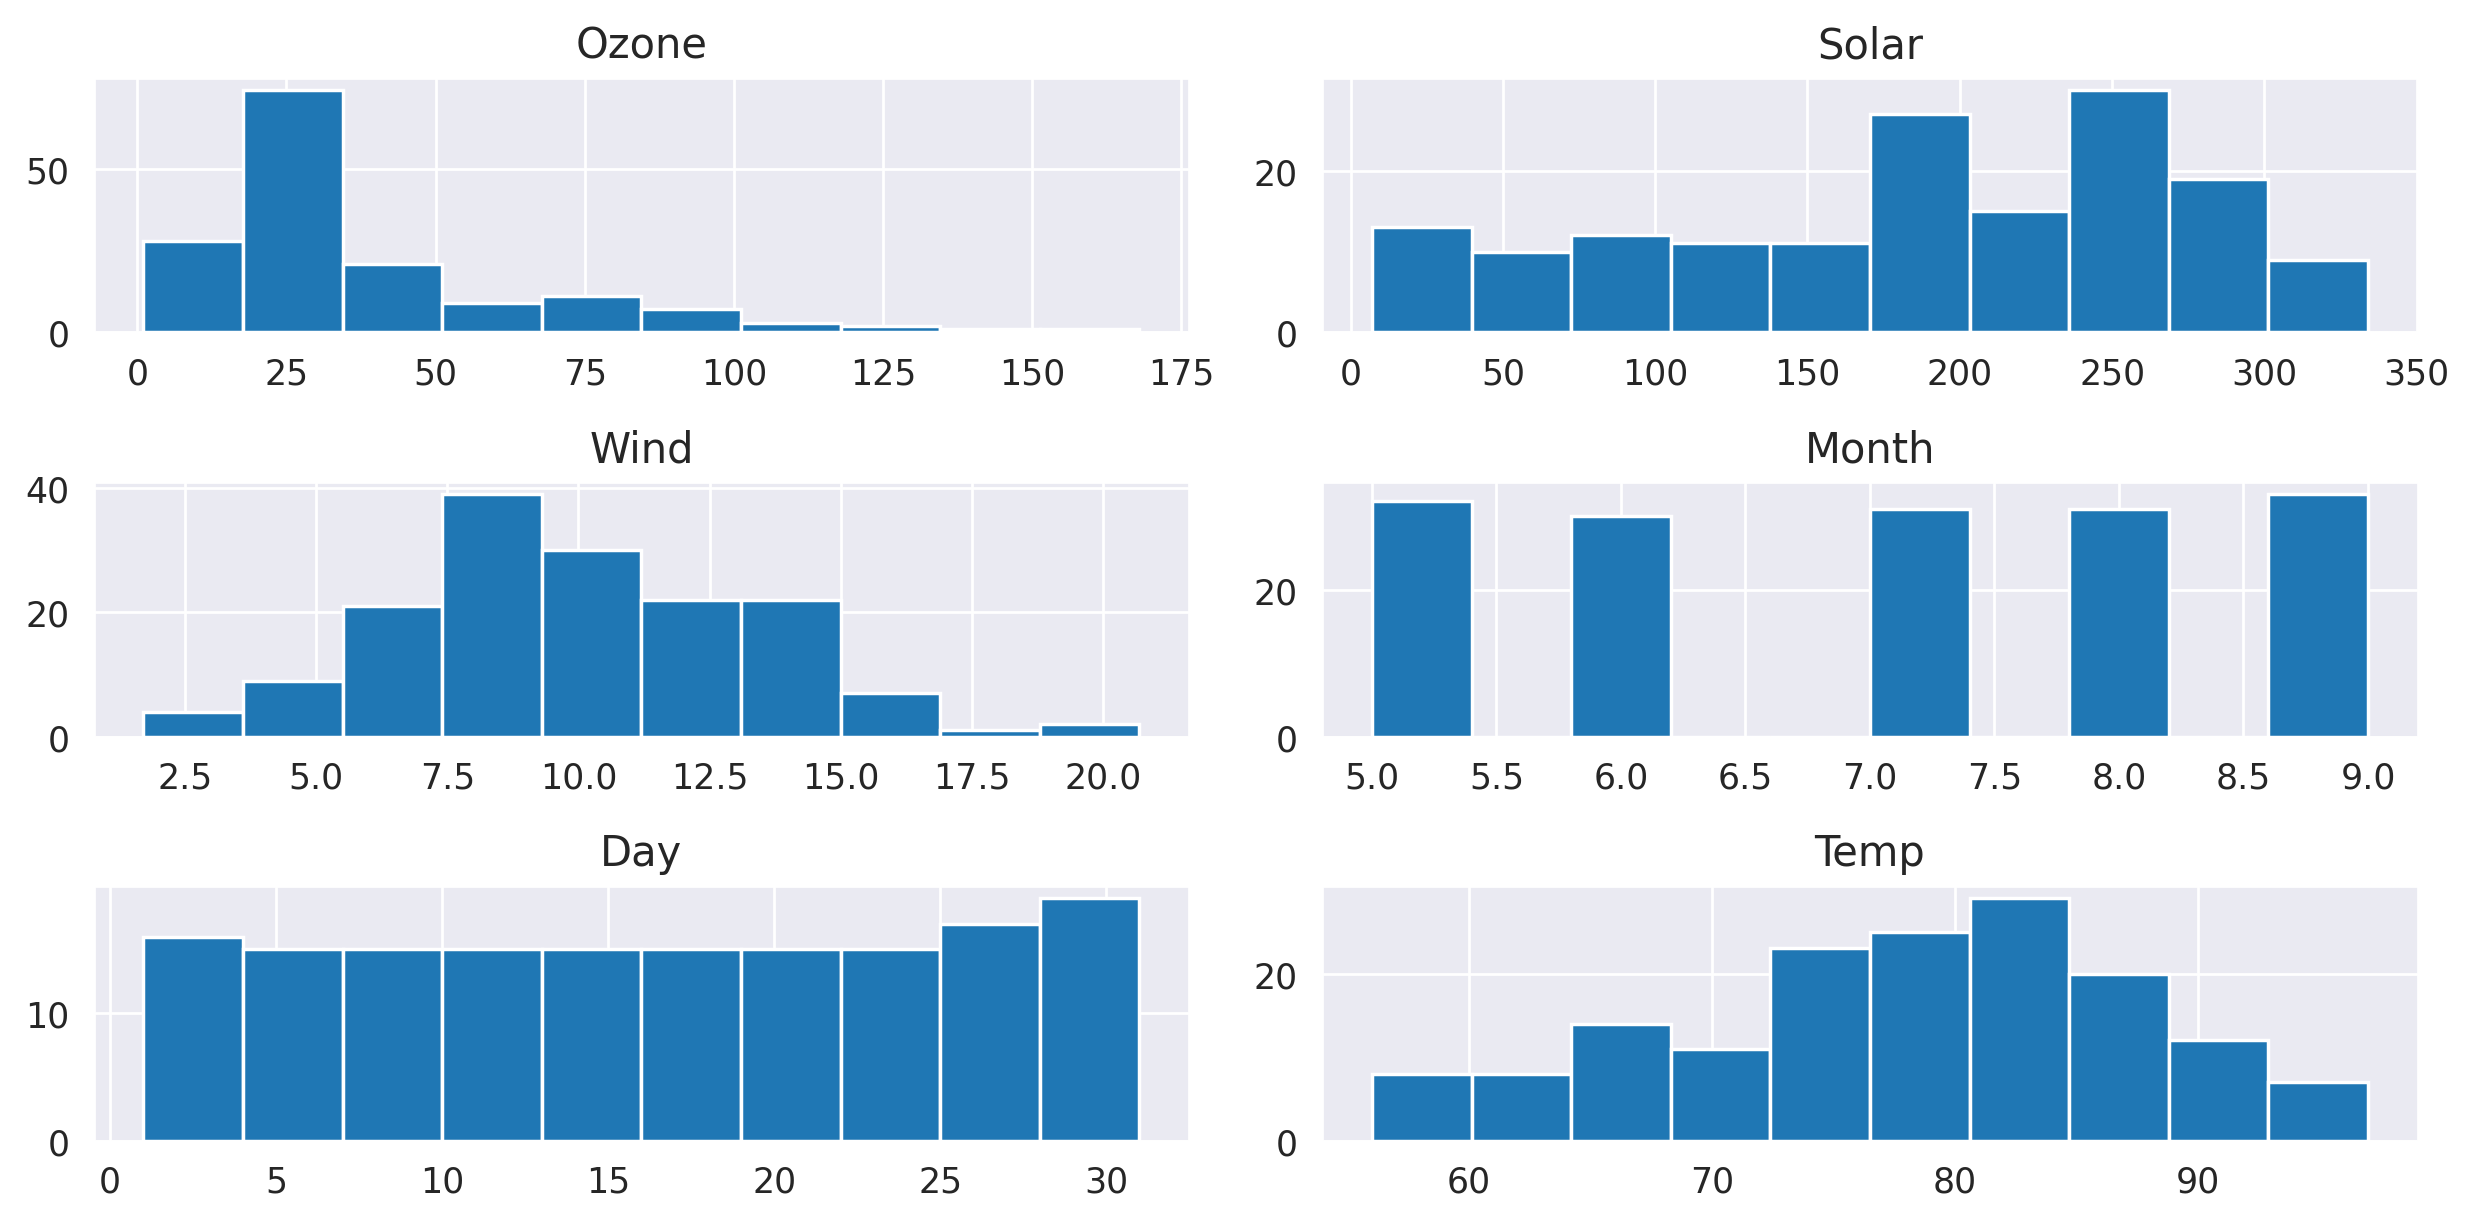

In [ ]:
#Histogram
df.hist()
plt.tight_layout()

<Axes: >

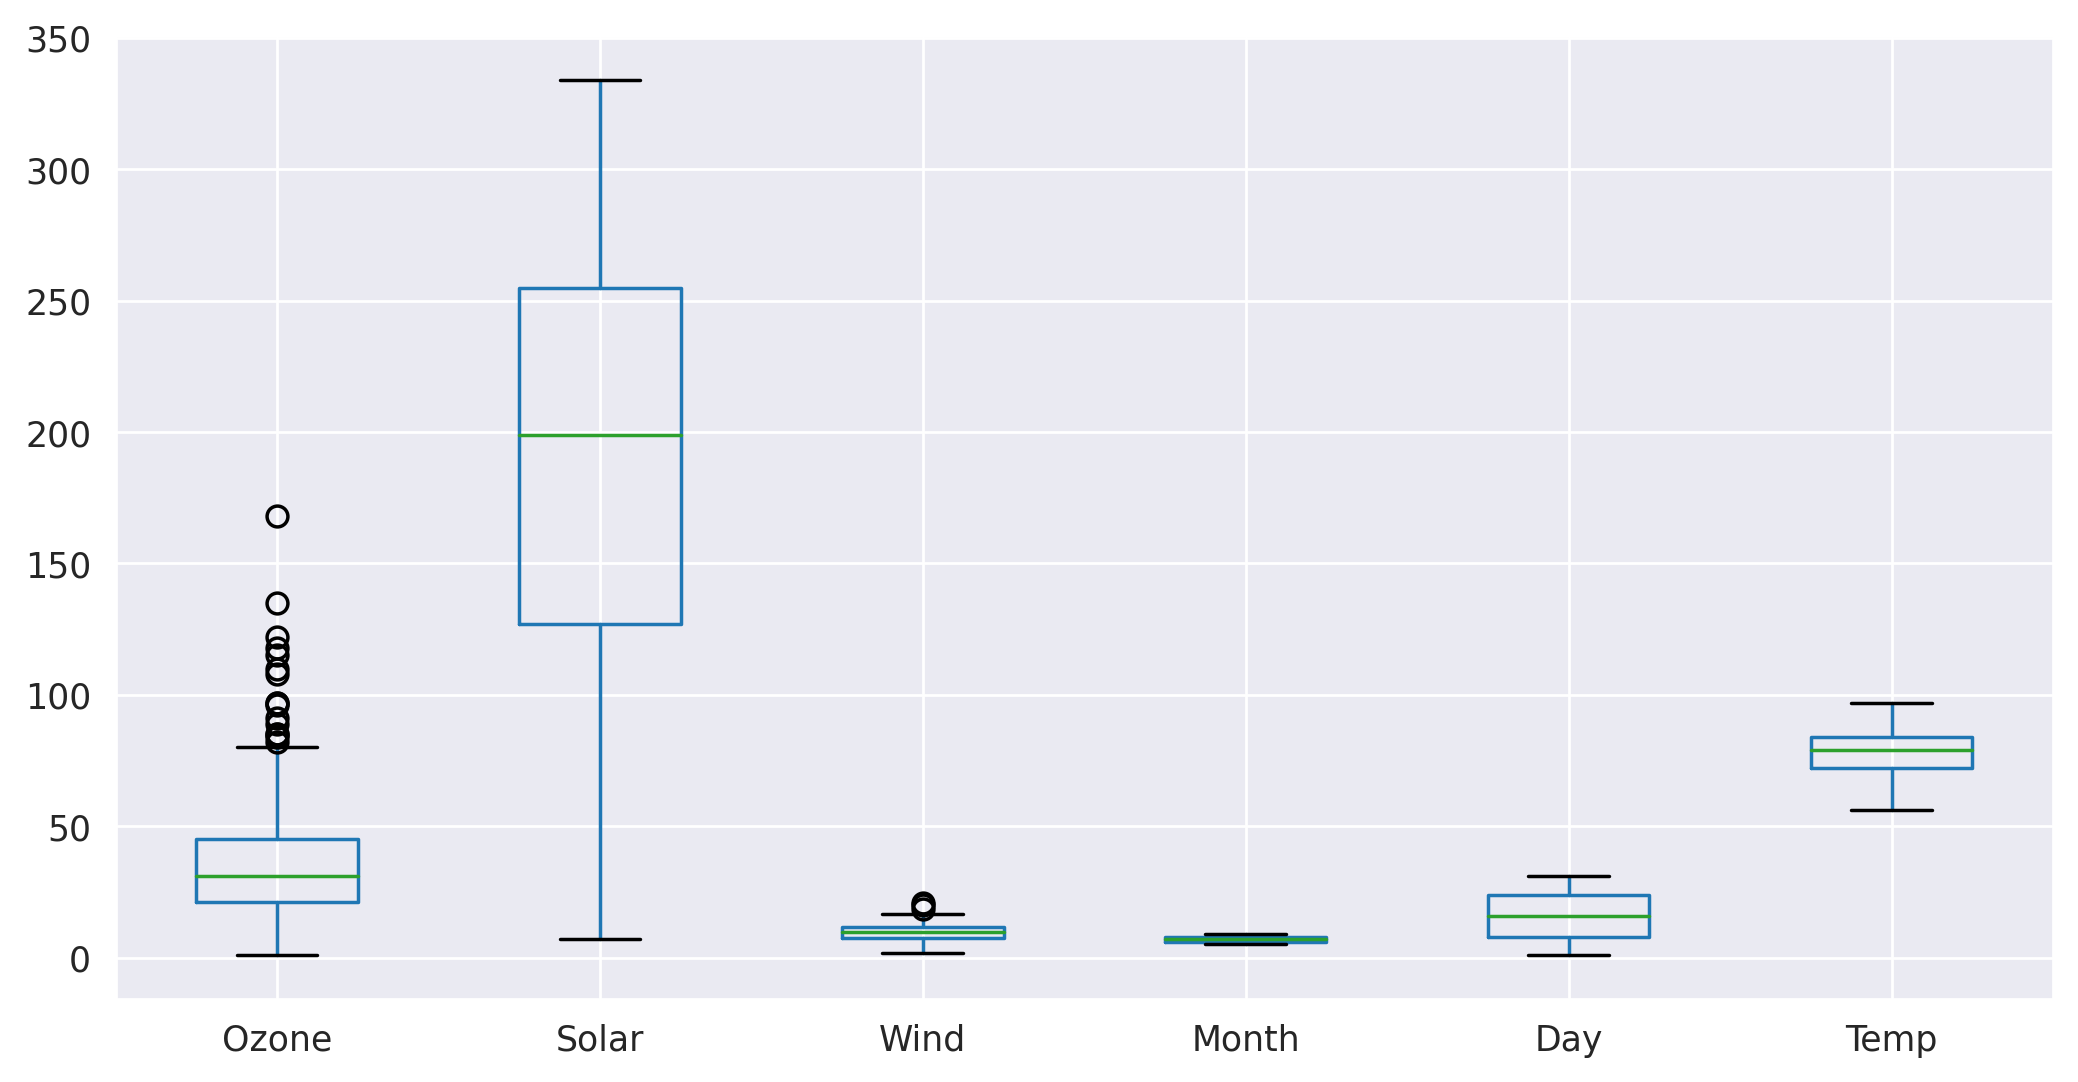

In [ ]:
#Boxplot
df.boxplot()

In [ ]:
#User defined outlier detection function
def outlier_detection(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1

    upper = q3+(1.5*iqr)
    lower = q1-(1.5*iqr)

    return lower,upper

In [ ]:
outlier_detection(df,'Ozone')
#It will show lower and upper value of Ozone column

(-15.0, 81.0)

In [ ]:
outlier_detection(df,'Wind')
#It will show lower and upper value of Wind column

(1.2500000000000009, 17.65)

In [ ]:
#Capping Outliers
df[df['Ozone'] > 81.0]

Ozone  Solar  Wind  Month  Day  Temp Weather
30   115.0  223.0   5.7      5   30    79       C
62   135.0  269.0   4.1      7    1    84       S
69    97.0  267.0   6.3      7    8    92      PS
70    97.0  272.0   5.7      7    9    92       C
71    85.0  175.0   7.4      7   10    89      PS
86   108.0  223.0   8.0      7   25    85      PS
89    82.0  213.0   7.4      7   28    88       S
99   122.0  255.0   4.0      8    7    89       C
100   89.0  229.0  10.3      8    8    90      PS
101  110.0  207.0   8.0      8    9    90       C
117  168.0  238.0   3.4      8   25    81      PS
121  118.0  225.0   2.3      8   29    94       S
122   84.0  237.0   6.3      8   30    96       S
123   85.0  188.0   6.3      8   31    94       C
124   96.0  167.0   6.9      9    1    91       C
127   91.0  189.0   4.6      9    4    93      PS

In [ ]:
#Capping Outliers
df[df['Wind'] > 17.65]

Ozone  Solar  Wind  Month  Day  Temp Weather
9     8.0   19.0  20.1      5    9    61      PS
18    6.0   78.0  18.4      5   18    57       C
48   37.0  284.0  20.7      6   17    72       C

In [ ]:
df.loc[df['Ozone'] > 81.0,'Ozone'] = 81.0
#Replace outliers by upper value

In [ ]:
df.loc[df['Wind']> 17.65,'Wind'] = 17.65
#Replace outliers by upper value

<Axes: >

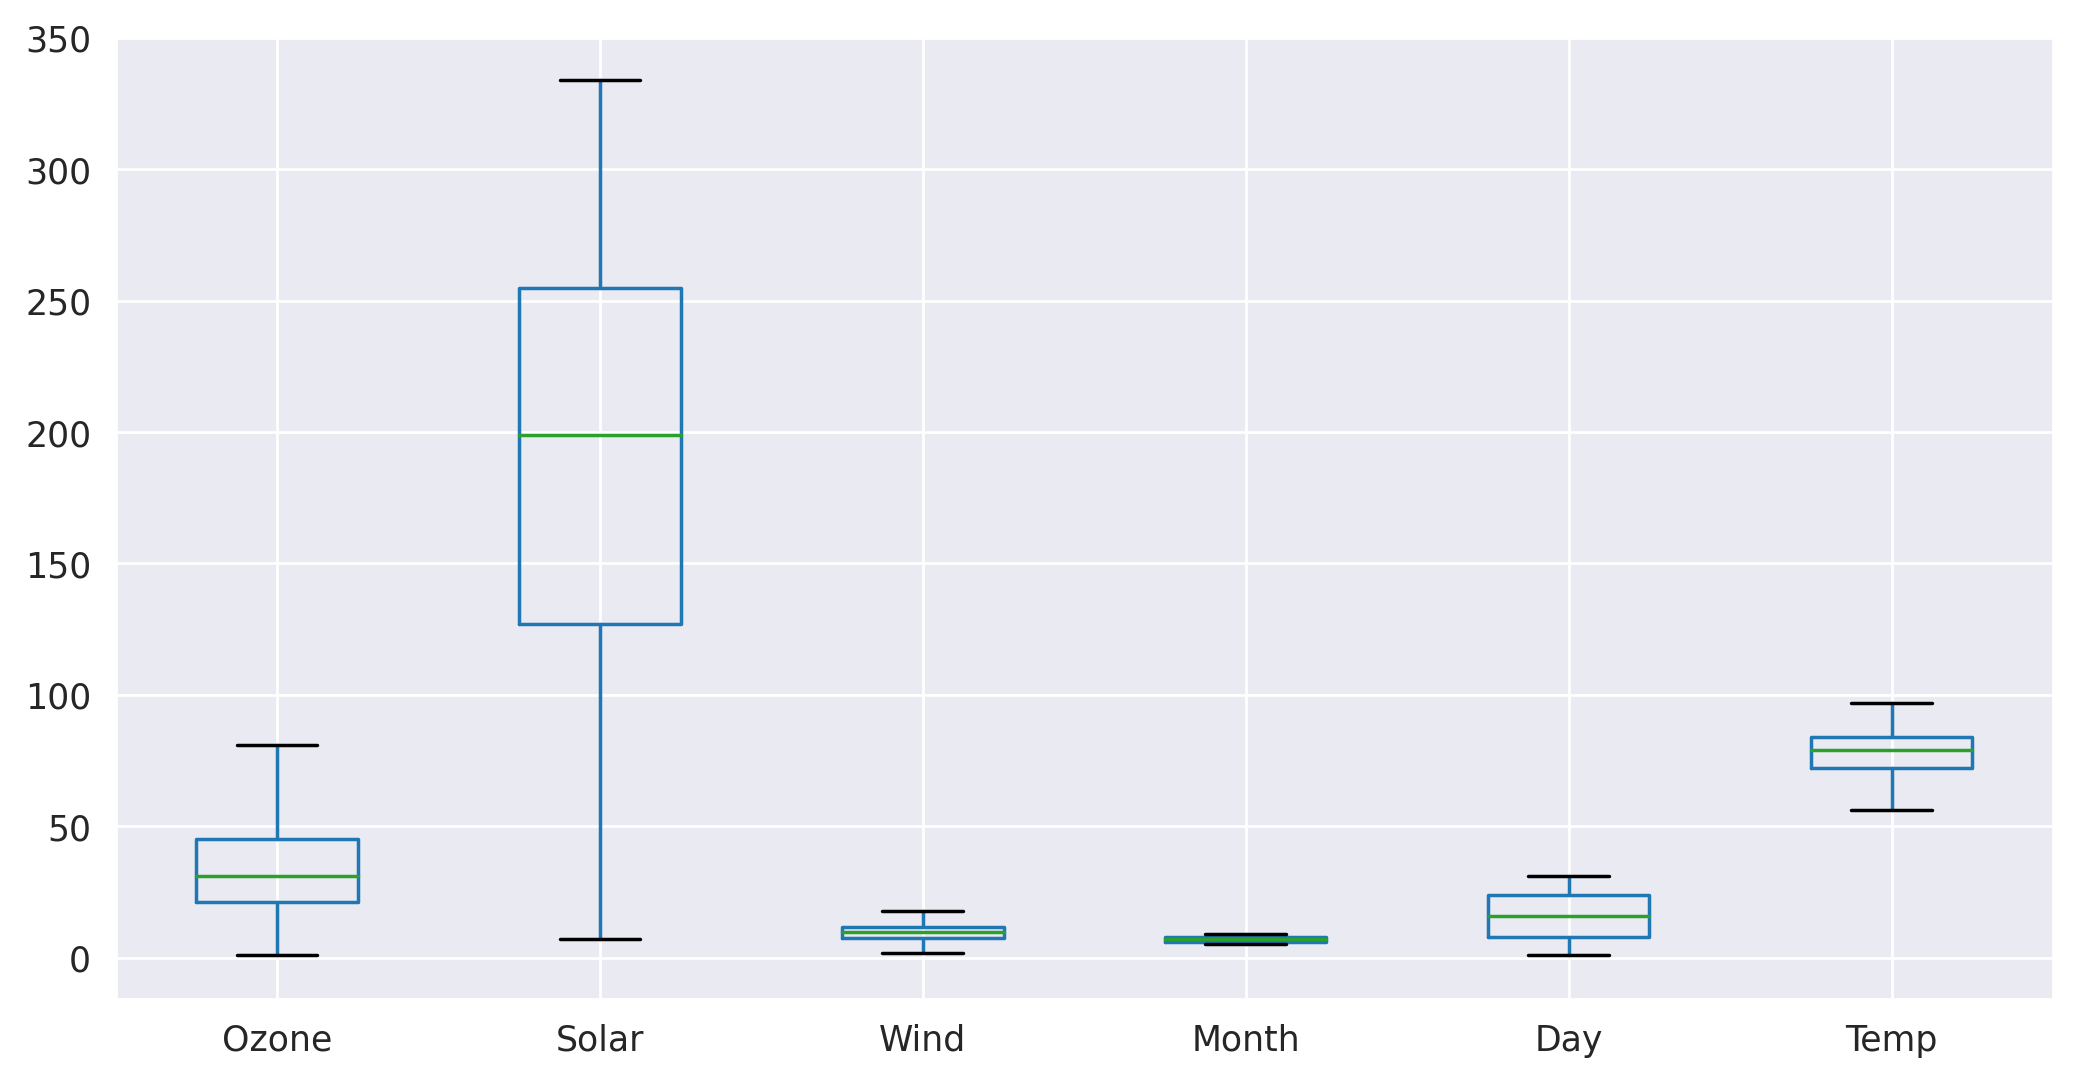

In [ ]:
df.boxplot()
#No outliers found

# **Scatter Plot and Correlation**

In [ ]:
df.head()

Ozone  Solar  Wind  Month  Day  Temp Weather
1   41.0  190.0   7.4      5    1    67       S
2   36.0  118.0   8.0      5    2    72       C
3   12.0  149.0  12.6      5    3    74      PS
4   18.0  313.0  11.5      5    4    62       S
5   31.0  199.0  14.3      5    5    56       S

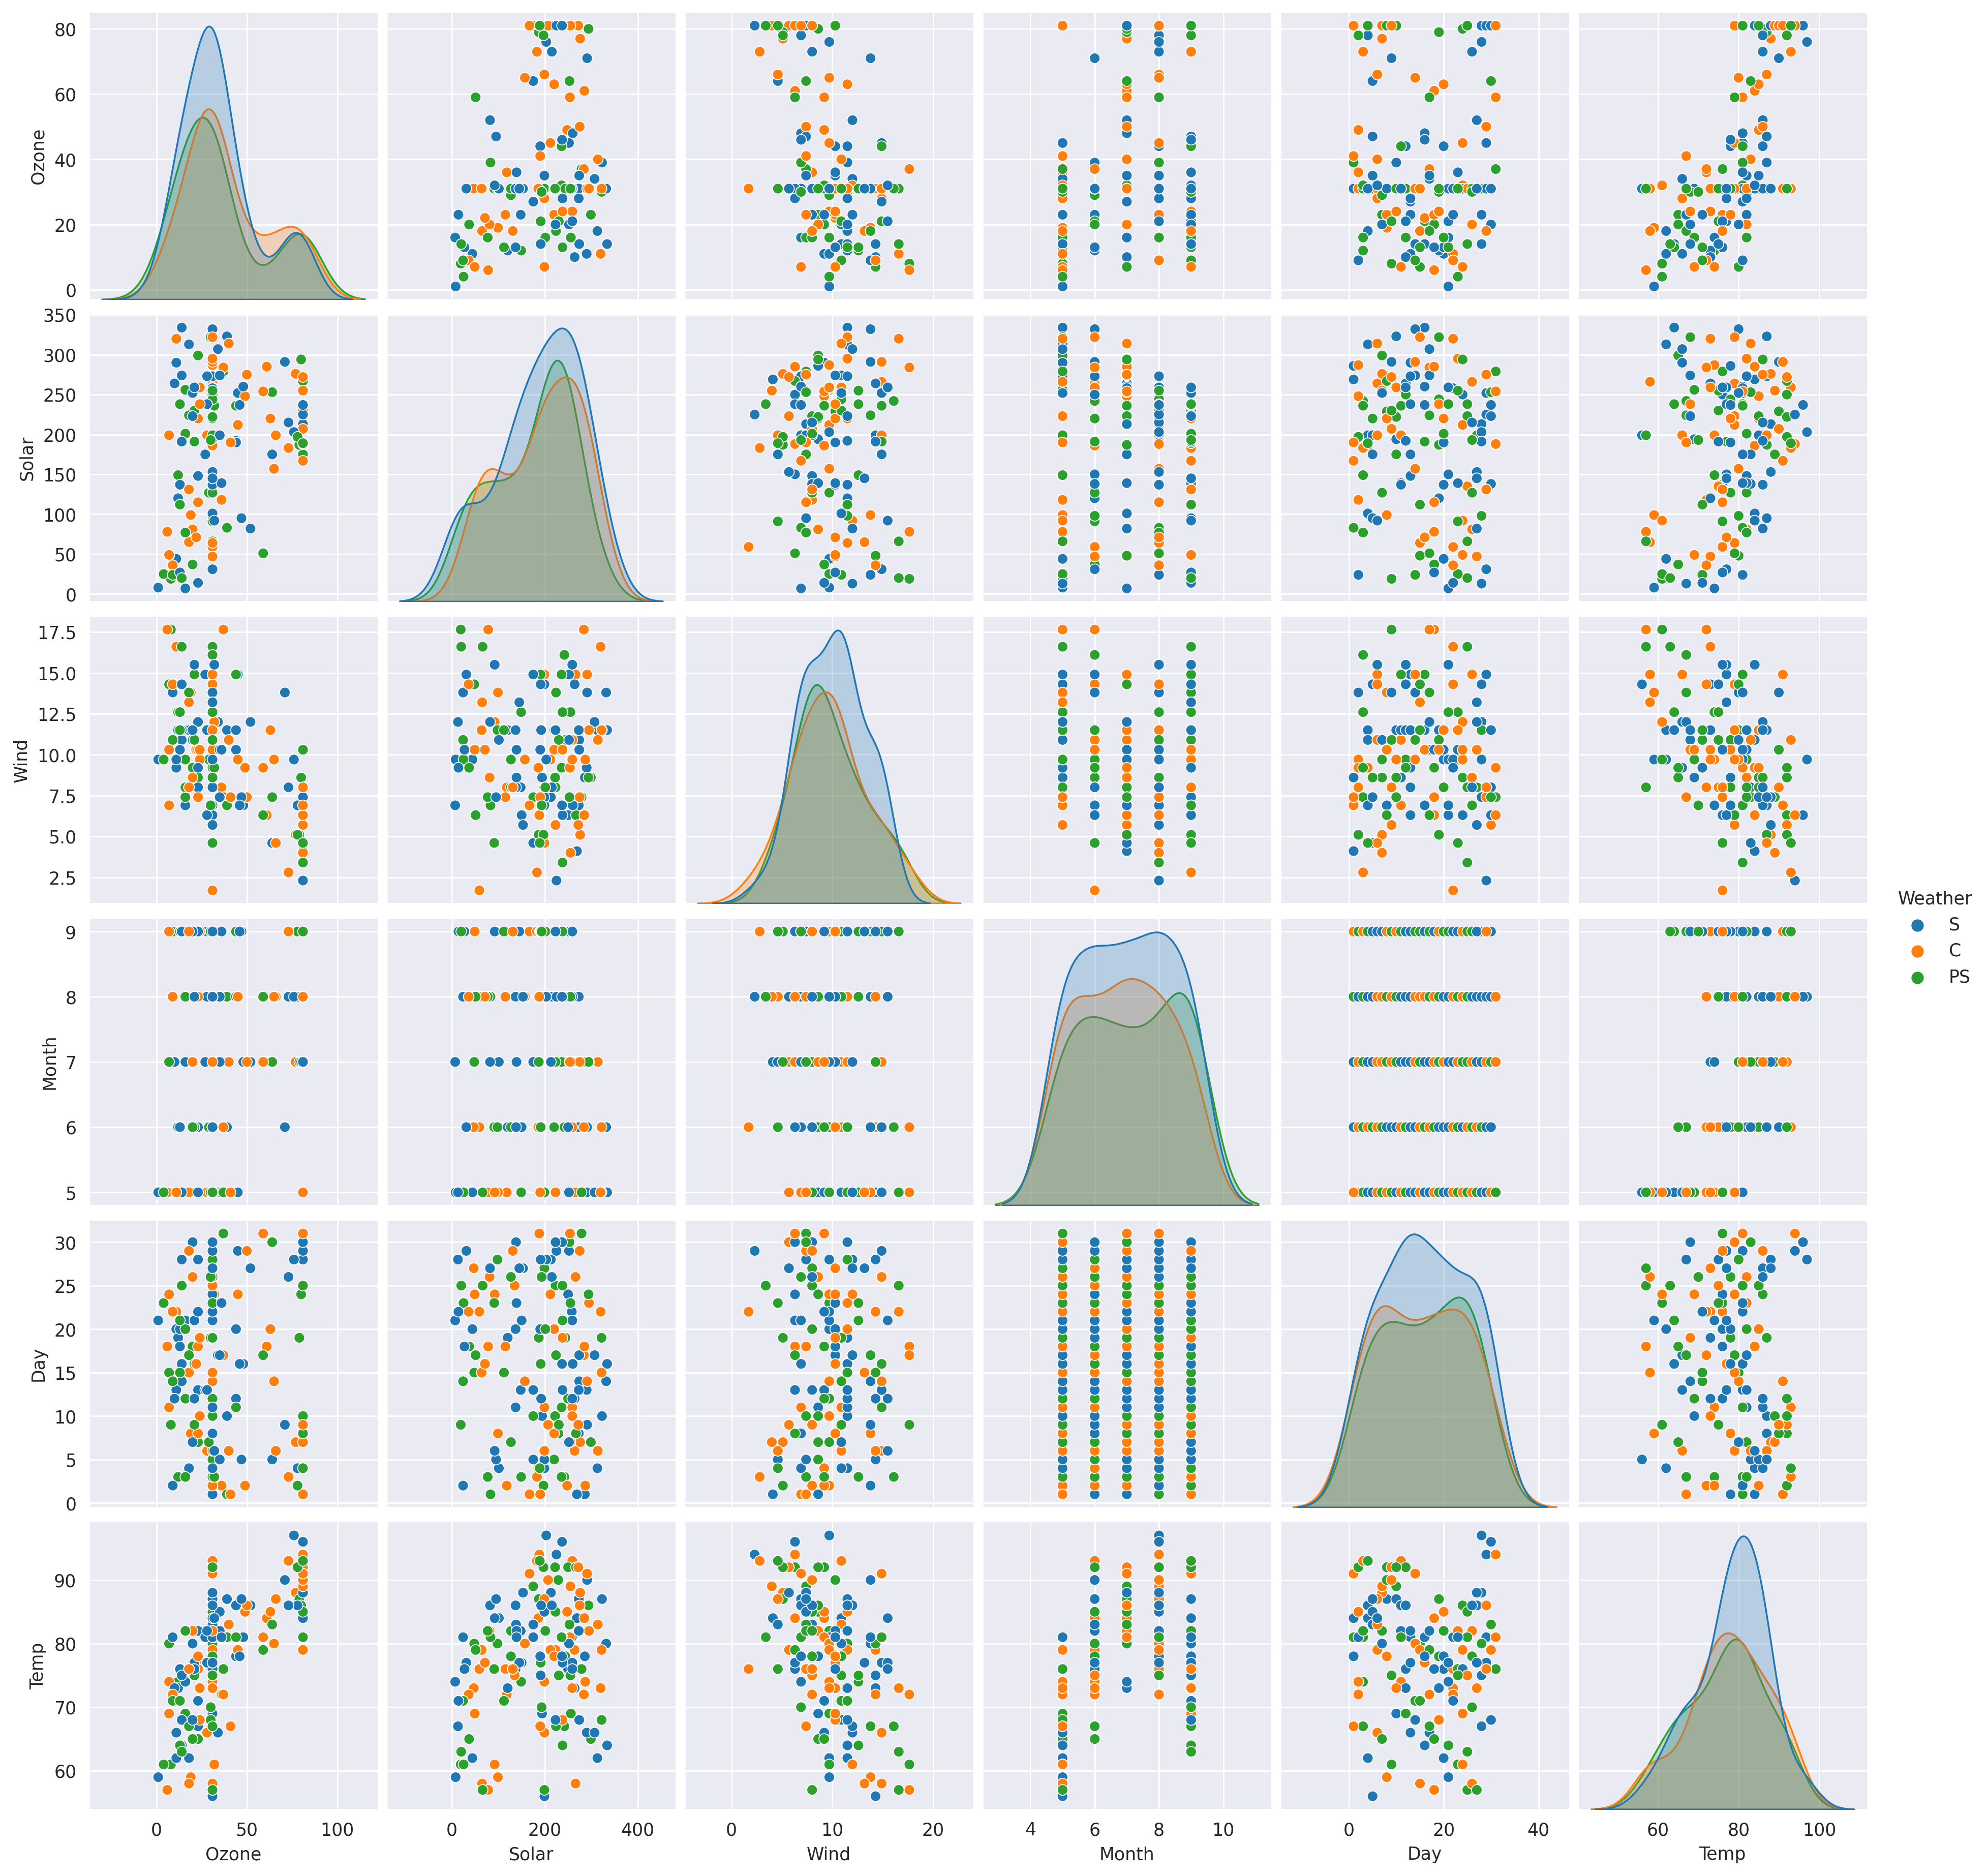

In [ ]:
sns.pairplot(df,hue = 'Weather')
#Pairplot for coorelation

In [ ]:
#Correlation coefficient
df.corr()

Ozone     Solar      Wind     Month       Day      Temp
Ozone  1.000000  0.318600 -0.522513  0.183089 -0.042835  0.662773
Solar  0.318600  1.000000 -0.055345 -0.083788 -0.156243  0.256994
Wind  -0.522513 -0.055345  1.000000 -0.162988  0.033374 -0.439939
Month  0.183089 -0.083788 -0.162988  1.000000  0.041438  0.408060
Day   -0.042835 -0.156243  0.033374  0.041438  1.000000 -0.122787
Temp   0.662773  0.256994 -0.439939  0.408060 -0.122787  1.000000

<Axes: >

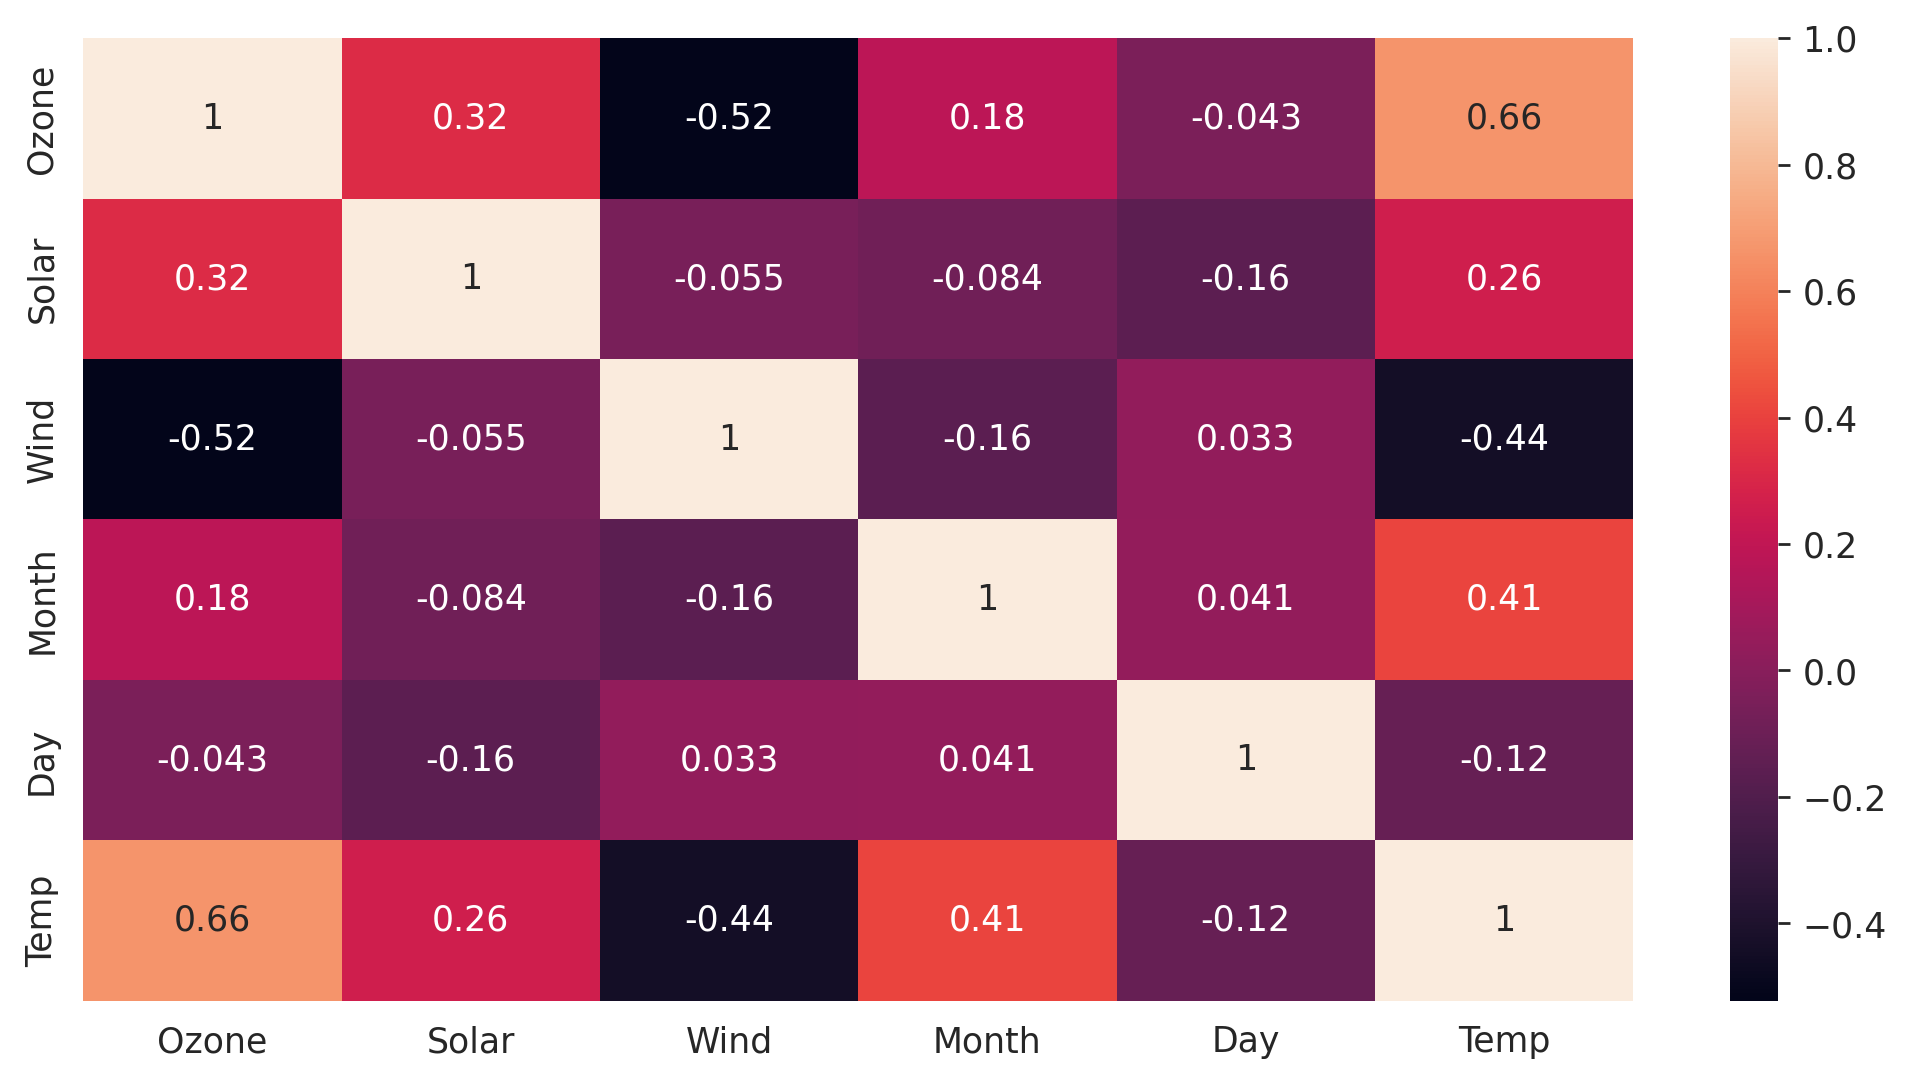

In [ ]:
sns.heatmap(df.corr(),annot=True)
#Heatmap for correlation

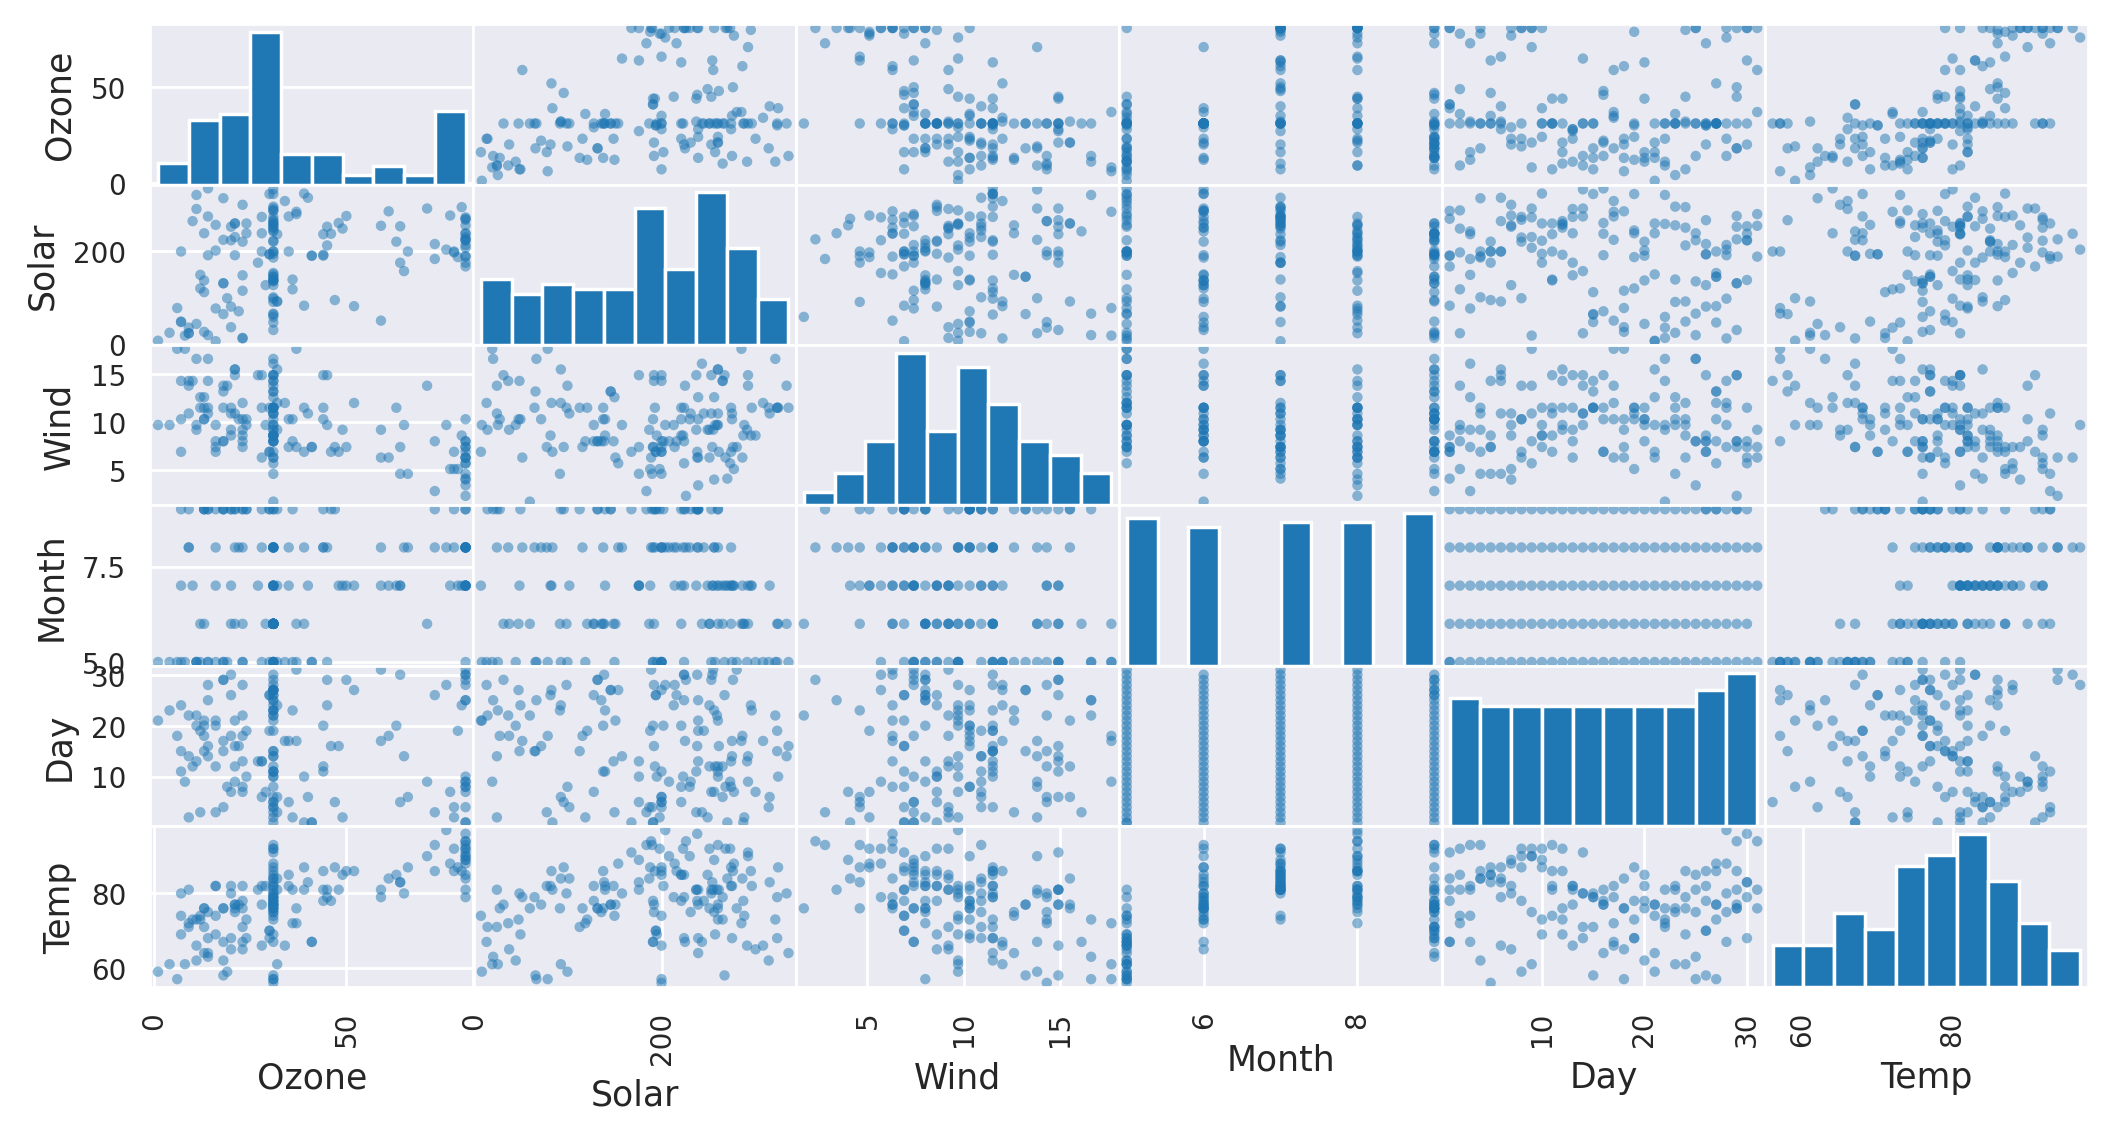

<Figure size 2500x1250 with 0 Axes>

In [ ]:
pd.plotting.scatter_matrix(df)
plt.show()
plt.tight_layout()
#Scatterplot for coorelation

# **Transformations**

Machines do not understand words and sentences.

Machines only understand numbers.

Before model building, we have convert all the categorical columns into numerical.

In [ ]:
#Encoding using pandas dummy function.
df.head()

Ozone  Solar  Wind  Month  Day  Temp Weather
1   41.0  190.0   7.4      5    1    67       S
2   36.0  118.0   8.0      5    2    72       C
3   12.0  149.0  12.6      5    3    74      PS
4   18.0  313.0  11.5      5    4    62       S
5   31.0  199.0  14.3      5    5    56       S

In [ ]:
#Encoding using pandas dummy function.
df = pd.get_dummies(data= df , columns = ['Weather'] )

In [ ]:
df

Ozone  Solar  Wind  Month  Day  Temp  Weather_C  Weather_PS  Weather_S
1     41.0  190.0   7.4      5    1    67          0           0          1
2     36.0  118.0   8.0      5    2    72          1           0          0
3     12.0  149.0  12.6      5    3    74          0           1          0
4     18.0  313.0  11.5      5    4    62          0           0          1
5     31.0  199.0  14.3      5    5    56          0           0          1
..     ...    ...   ...    ...  ...   ...        ...         ...        ...
153   20.0  223.0  11.5      9   30    68          0           0          1
154   41.0  190.0   7.4      5    1    67          1           0          0
155   30.0  193.0   6.9      9   26    70          0           1          0
156   31.0  145.0  13.2      9   27    77          0           0          1
158   18.0  131.0   8.0      9   29    76          1           0          0

[157 rows x 9 columns]

# ***Scaling the data***

*    Normalization

     >  Scales value within the range of 0 to 1.


*   Standardization

     > Uses Z score for scaling.

     > Scale values in such a way that the mean = 0 and standard deviation is 1.




     








In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
#Normalization

mn = MinMaxScaler()

In [ ]:
Normalized_data =pd.DataFrame(mn.fit_transform(df), columns = df.columns)
Normalized_data

Ozone     Solar      Wind  Month       Day      Temp  Weather_C  \
0    0.5000  0.559633  0.357367    0.0  0.000000  0.268293        0.0   
1    0.4375  0.339450  0.394984    0.0  0.033333  0.390244        1.0   
2    0.1375  0.434251  0.683386    0.0  0.066667  0.439024        0.0   
3    0.2125  0.935780  0.614420    0.0  0.100000  0.146341        0.0   
4    0.3750  0.587156  0.789969    0.0  0.133333  0.000000        0.0   
..      ...       ...       ...    ...       ...       ...        ...   
152  0.2375  0.660550  0.614420    1.0  0.966667  0.292683        0.0   
153  0.5000  0.559633  0.357367    0.0  0.000000  0.268293        1.0   
154  0.3625  0.568807  0.326019    1.0  0.833333  0.341463        0.0   
155  0.3750  0.422018  0.721003    1.0  0.866667  0.512195        0.0   
156  0.2125  0.379205  0.394984    1.0  0.933333  0.487805        1.0   

     Weather_PS  Weather_S  
0           0.0        1.0  
1           0.0        0.0  
2           1.0        0.0  
3           0.0        1.0  
4           0.0        1.0  
..          ...        ...  
152         0.0        1.0  
153         0.0        0.0  
154         1.0        0.0  
155         0.0        1.0  
156         0.0        0.0  

[157 rows x 9 columns]

In [ ]:
Normalized_data.describe()

Ozone       Solar        Wind       Month         Day        Temp  \
count  157.000000  157.000000  157.000000  157.000000  157.000000  157.000000   
mean     0.446736    0.547323    0.513488    0.504777    0.497665    0.530371   
std      0.280949    0.266192    0.213207    0.358584    0.299147    0.229398   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.250000    0.366972    0.357367    0.250000    0.233333    0.390244   
50%      0.375000    0.587156    0.501567    0.500000    0.500000    0.560976   
75%      0.550000    0.758410    0.614420    0.750000    0.766667    0.682927   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        Weather_C  Weather_PS   Weather_S  
count  157.000000  157.000000  157.000000  
mean     0.312102    0.299363    0.388535  
std      0.464834    0.459445    0.488977  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      1.000000    1.000000    1.000000  
max      1.000000    1.000000    1.000000

In [ ]:
sc = StandardScaler()

In [ ]:
stand_df = pd.DataFrame(sc.fit_transform(df), columns = df.columns)

In [ ]:
stand_df

Ozone     Solar      Wind     Month       Day      Temp  Weather_C  \
0    0.190194  0.046394 -0.734593 -1.412198 -1.668937 -1.146116  -0.673575   
1   -0.032978 -0.783413 -0.557592 -1.412198 -1.557152 -0.612802   1.484615   
2   -1.104203 -0.426135  0.799418 -1.412198 -1.445367 -0.399476  -0.673575   
3   -0.836397  1.463982  0.474916 -1.412198 -1.333583 -1.679431  -0.673575   
4   -0.256150  0.150120  1.300922 -1.412198 -1.221798 -2.319408  -0.673575   
..        ...       ...       ...       ...       ...       ...        ...   
152 -0.747128  0.426722  0.474916  1.385469  1.572816 -1.039454  -0.673575   
153  0.190194  0.046394 -0.734593 -1.412198 -1.668937 -1.146116   1.484615   
154 -0.300784  0.080969 -0.882094  1.385469  1.125678 -0.826128  -0.673575   
155 -0.256150 -0.472236  0.976420  1.385469  1.237462 -0.079488  -0.673575   
156 -0.836397 -0.633587 -0.557592  1.385469  1.461032 -0.186150   1.484615   

     Weather_PS  Weather_S  
0     -0.653661    1.25450  
1     -0.653661   -0.79713  
2      1.529845   -0.79713  
3     -0.653661    1.25450  
4     -0.653661    1.25450  
..          ...        ...  
152   -0.653661    1.25450  
153   -0.653661   -0.79713  
154    1.529845   -0.79713  
155   -0.653661    1.25450  
156   -0.653661   -0.79713  

[157 rows x 9 columns]

In [ ]:
stand_df.describe()

Ozone         Solar          Wind         Month           Day  \
count  1.570000e+02  1.570000e+02  1.570000e+02  1.570000e+02  1.570000e+02   
mean  -3.394312e-17 -1.018294e-16  1.470869e-16  1.810300e-16 -2.262875e-17   
std    1.003200e+00  1.003200e+00  1.003200e+00  1.003200e+00  1.003200e+00   
min   -1.595181e+00 -2.062700e+00 -2.416106e+00 -1.412198e+00 -1.668937e+00   
25%   -7.024938e-01 -6.796874e-01 -7.345931e-01 -7.127815e-01 -8.864446e-01   
50%   -2.561501e-01  1.501200e-01 -5.608800e-02 -1.336465e-02  7.832041e-03   
75%    3.687310e-01  7.955257e-01  4.749160e-01  6.860522e-01  9.021087e-01   
max    1.975568e+00  1.706009e+00  2.289180e+00  1.385469e+00  1.684601e+00   

               Temp     Weather_C    Weather_PS     Weather_S  
count  1.570000e+02  1.570000e+02  1.570000e+02  1.570000e+02  
mean   2.036587e-16  4.242891e-17 -8.485781e-18 -7.849347e-17  
std    1.003200e+00  1.003200e+00  1.003200e+00  1.003200e+00  
min   -2.319408e+00 -6.735753e-01 -6.536610e-01 -7.971303e-01  
25%   -6.128020e-01 -6.735753e-01 -6.536610e-01 -7.971303e-01  
50%    1.338381e-01 -6.735753e-01 -6.536610e-01 -7.971303e-01  
75%    6.671525e-01  1.484615e+00  1.529845e+00  1.254500e+00  
max    2.053770e+00  1.484615e+00  1.529845e+00  1.254500e+00